In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("titanic_data.csv")

In [4]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.drop(["PassengerId","Name","Ticket","Cabin","Fare"],axis=1,inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [9]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Embarked      2
dtype: int64

In [10]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [12]:
df.Embarked.fillna('S',inplace=True)

In [13]:
df.Age.fillna(df.Age.mean(),inplace=True)

<Axes: xlabel='Survived', ylabel='count'>

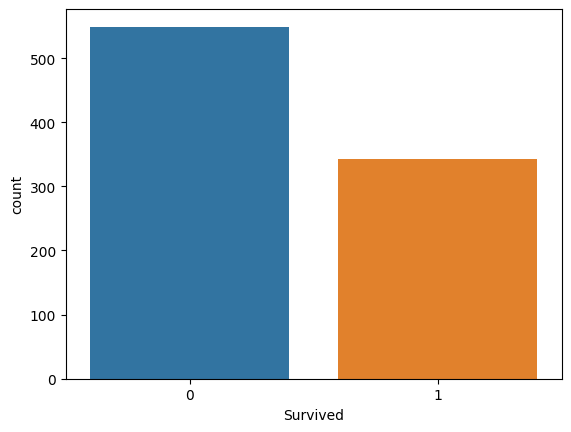

In [14]:
sns.countplot(x="Survived",data=df)

<Axes: xlabel='Survived', ylabel='count'>

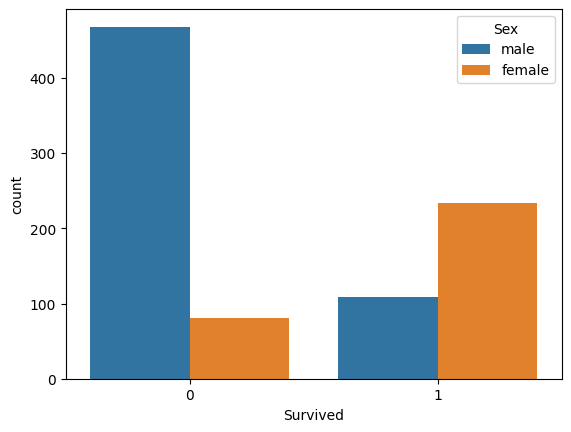

In [15]:
sns.countplot(x="Survived",hue="Sex",data=df)

<Axes: xlabel='Survived', ylabel='count'>

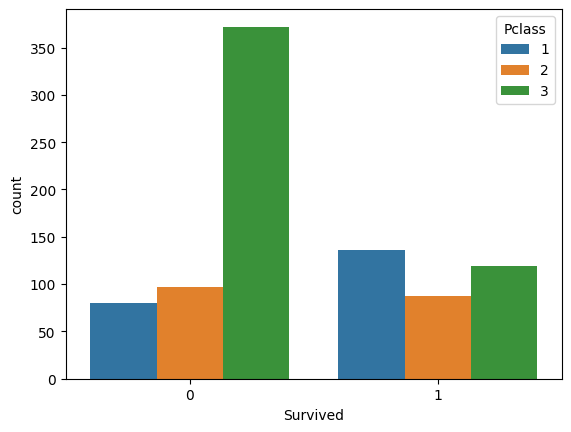

In [16]:
sns.countplot(x="Survived",hue="Pclass",data=df)

In [17]:
sex=pd.get_dummies(df.Sex,drop_first=True)

In [18]:
df.drop("Sex",axis=1,inplace=True)


In [19]:
embarked=pd.get_dummies(df.Embarked,drop_first=True)

In [20]:
df.drop("Embarked",axis=1,inplace=True)

In [21]:
df=pd.concat([df,sex,embarked],axis=1)

In [22]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1


In [23]:
a=df.SibSp.tolist()


In [24]:
b=df.Parch.tolist()


In [25]:
relations=[]
def add(a,b):

  for i in range(len(a)):
    r=a[i]+b[i]
    relations.append(r)
  return relations

relations=add(a,b)

In [26]:
new = pd.Series(relations)
df['relation'] = new.values

In [27]:
df.drop(["SibSp","Parch"],axis=1,inplace=True)

In [28]:
df.head()

,Survived,Pclass,Age,male,Q,S,relation
0,0,3,22.0,1,0,1,1
1,1,1,38.0,0,0,0,1
2,1,3,26.0,0,0,1,0
3,1,1,35.0,0,0,1,1
4,0,3,35.0,1,0,1,0


In [29]:
X=df.iloc[:,1:7].values


In [30]:
Y=df.iloc[:,0].values

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [33]:
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)

Confusion Matrix:


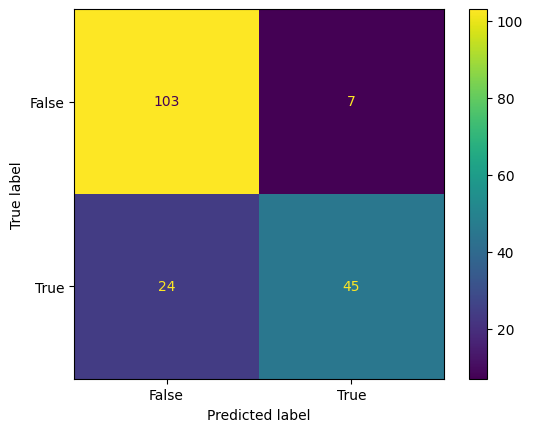

[[103   7]
 [ 24  45]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       110
           1       0.87      0.65      0.74        69

    accuracy                           0.83       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.83      0.83      0.82       179



In [34]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn.metrics import classification_report,confusion_matrix
confusion = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
matrix=ConfusionMatrixDisplay(confusion,display_labels=[False,True])
matrix.plot()
plt.show()
print(confusion)

report=classification_report(Y_test,y_pred)
print("Classification Report:")
print(report)

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred)

0.8268156424581006